<a href="https://colab.research.google.com/github/macdinh99/LSTM_GRU_Hydrid/blob/main/GRUvsLSTM_Ver1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buoc 1: Khai bao thu vien lam viec

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots
#Cac lop xay dung mo hinh
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.models import Sequential
from keras.layers import LSTM,GRU
from keras.layers import Dropout
from keras.layers import Dense
#Kiem tra do chinh xac
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance

Buoc 2: Doc du lieu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Doc du lieu tu csv
df=pd.read_csv('/content/drive/MyDrive/VNindex_Ver4.csv')

Buoc 3: Mo ta va dinh dang du lieu

In [4]:
#Dinh dang cau truc theo time series
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")

In [5]:
#Dinh dang du lieu kieu Object thanh Float
df["Price"] = df["Price"].str.replace(",", "").astype(float)

In [6]:
df = df.sort_values('Date', ascending=True)

In [7]:
print("Starting date: ",df.iloc[0][0])
print("Ending date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0]-df.iloc[0][0])

Starting date:  2008-07-14 00:00:00
Ending date:  2023-07-14 00:00:00
Duration:  5478 days 00:00:00


Buoc 4: Chuan bi xu ly du lieu

In [ ]:
#GRU: Phan lay va xu ly du lieu

In [8]:
df2=df.copy()

In [9]:
#Lay du lieu ngay va ket phien giao dich
df2=df2[['Date','Price']]

In [10]:
df2 = df2.sort_values('Date', ascending=True)
df2.index=df2.Date

In [11]:
#Chuan hoa mo hinh
del df2['Date']
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
print(df2.shape)

(3747, 1)


In [12]:
#Chia tap du lieu
training_size=int(len(df2)*0.80)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2997, 1)
test_data:  (750, 1)


In [13]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2946, 50)
y_train:  (2946,)
X_test:  (699, 50)
y_test (699,)


In [15]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2946, 50, 1)
X_test:  (699, 50, 1)


In [ ]:
#GRU: Ket thuc phan lay va xu ly du lieu

In [ ]:
#LSTM: Phan lay va xu ly du lieu

In [ ]:
#Lay du lieu
df1=pd.DataFrame(df,columns=['Date','Price'])
df1.index=df1.Date
df1.drop("Date",axis=1,inplace=True)

In [ ]:
#Chia tap du lieu
data=df1.values
l_training_size=int(len(df1)*0.80)
l_test_size=len(df1)-l_training_size
l_train_data,l_test_data=df1[:l_training_size],df1[l_training_size:]
print("train_data: ", l_train_data.shape)
print("test_data: ", l_test_data.shape)

train_data:  (2997, 1)
test_data:  (750, 1)


In [ ]:
#Chuan hoa du lieu
sc=MinMaxScaler(feature_range=(0,1))
sc_train=sc.fit_transform(data)

In [ ]:
#Tao vong lap cac gia tri
l_x_train, l_y_train=[],[]
for i in range(50,len(l_train_data)):
    l_x_train.append(sc_train[i-50:i,0])
    l_y_train.append(sc_train[i,0])

In [ ]:
#Xep du lieu thanh 1 mang
l_x_train=np.array(l_x_train)
l_y_train=np.array(l_y_train)

In [ ]:
#Xep du lieu thanh mang 1 chieu
l_x_train=np.reshape(l_x_train,(l_x_train.shape[0],l_x_train.shape[1],1))
l_y_train=np.reshape(l_y_train,(l_y_train.shape[0],1))

In [ ]:
#LSTM: Ket thuc phan xu ly du lieu

Buoc 5: Xay dung va huan luyen mo hinh

In [ ]:
#GRU: Xay dung mo hinh

In [16]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(128,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(64))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50, 128)           50304     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 87,617
Trainable params: 87,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#GRU: Ket thuc xay dung mo hinh

In [ ]:
#LSTM: Xay dung mo hinh

In [ ]:
tf.keras.backend.clear_session()
l_model=Sequential()
l_model.add(LSTM(units=128,input_shape=(l_x_train.shape[1],1),return_sequences=True))
l_model.add(LSTM(units=64))
l_model.add(Dropout(0.25))
l_model.add(Dense(1))
l_model.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
l_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#LSTM: Ket thuc xay dung mo hinh

In [18]:
#GRU: Huan luyen mo hinh

In [19]:
start_time = dt.datetime.now()
history1 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=50,verbose=1)
end_time = dt.datetime.now()
execution_time = end_time - start_time
print("Thời gian thực thi: ", execution_time)

Epoch 1/100
59/59 [==============================] - 18s 175ms/step - loss: 0.0474 - val_loss: 0.0192
Epoch 2/100
59/59 [==============================] - 7s 117ms/step - loss: 0.0228 - val_loss: 0.0249
Epoch 3/100
59/59 [==============================] - 9s 150ms/step - loss: 0.0196 - val_loss: 0.0111
Epoch 4/100
59/59 [==============================] - 7s 112ms/step - loss: 0.0210 - val_loss: 0.0107
Epoch 5/100
59/59 [==============================] - 9s 149ms/step - loss: 0.0183 - val_loss: 0.0144
Epoch 6/100
59/59 [==============================] - 7s 112ms/step - loss: 0.0181 - val_loss: 0.0120
Epoch 7/100
59/59 [==============================] - 9s 146ms/step - loss: 0.0179 - val_loss: 0.0120
Epoch 8/100
59/59 [==============================] - 7s 127ms/step - loss: 0.0172 - val_loss: 0.0114
Epoch 9/100
59/59 [==============================] - 8s 136ms/step - loss: 0.0172 - val_loss: 0.0391
Epoch 10/100
59/59 [==============================] - 9s 156ms/step - loss: 0.0170 - val_l

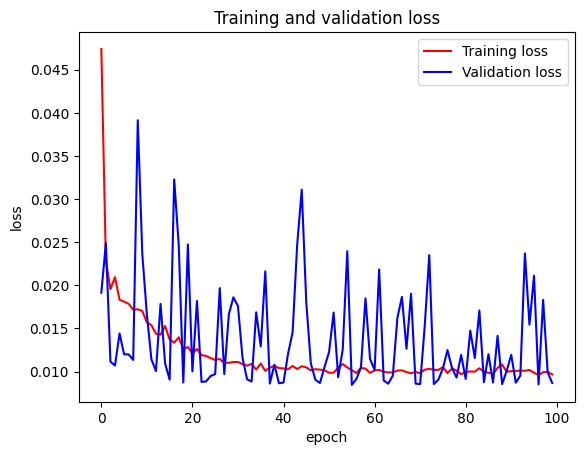

<Figure size 640x480 with 0 Axes>

In [20]:
# summarize history for loss (GRU)
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
#GRU: Ket thuc huan luyen mo hinh

In [ ]:
#LSTM: Huan luyen mo hinh

In [ ]:
start_time = dt.datetime.now()
save_model="save_model_Ver61.hdf5"
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
history=l_model.fit(l_x_train,l_y_train,validation_split = 0.2,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])
end_time = dt.datetime.now()
execution_time = end_time - start_time
print("Thời gian thực thi: ", execution_time)

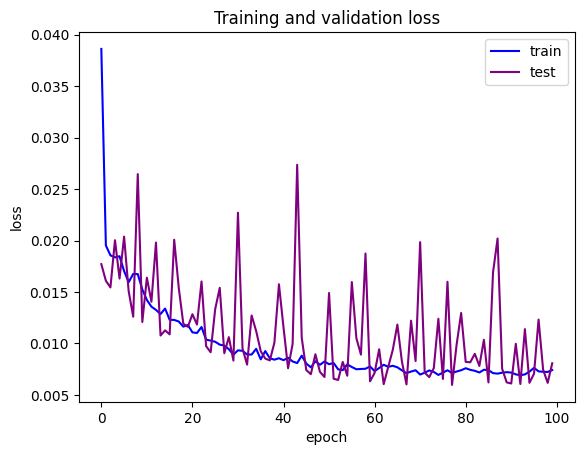

In [ ]:
# summarize history for loss (LSTM)
plt.plot(history.history['loss'],'blue', label='Training loss')
plt.plot(history.history['val_loss'],'purple', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc=0)

In [ ]:
#LSTM: Ket thuc huan luyen mo hinh

In [ ]:
#GRU vs LSTM: Ve bieu do Loss va Val_Loss

NameError: ignored

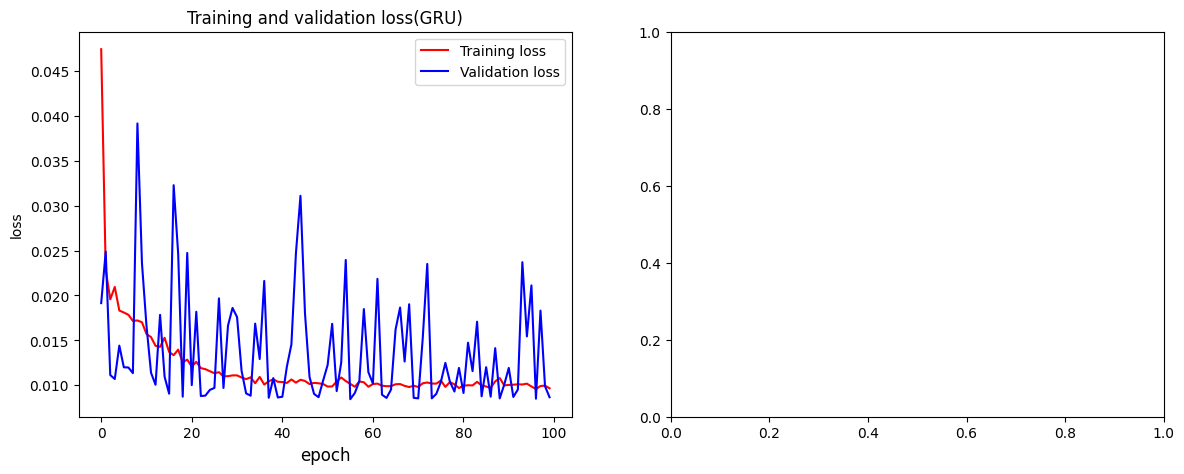

In [21]:
# summarize history for loss (GRU vs LSTM)
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,5))
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(loss))
ax1.plot(epochs, loss, 'r', label='Training loss')
ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_xlabel("epoch", fontsize=12)
ax1.set_ylabel("loss")
ax1.set_title("Training and validation loss(GRU)")
ax1.legend(loc=0)

ax2.plot(history.history['loss'],'blue', label='Training loss')
ax2.plot(history.history['val_loss'],'purple', label='Validation loss')
ax2.set_xlabel("epoch", fontsize=12)
ax2.set_ylabel("loss")
ax2.set_title("Training and validation loss(LSTM)")
ax2.legend(loc=0)

In [ ]:
#GRU vs LSTM: Ket thuc ve bieu do Loss va Val_Loss

Buoc 6: Ap dung mo hinh

In [ ]:
#GRU: Ap dung mo hinh

In [22]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

22/22 [==============================] - 1s 25ms/step


((2946, 1), (699, 1))

In [23]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [24]:
# shift train predictions for plotting
close_stock = df.copy()
look_back=time_step
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Price'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3747, 1)
Test predicted data:  (3747, 1)


In [ ]:
#GRU: Ket thuc ap dung mo hinh

In [ ]:
#LSTM: Ap dung mo hinh

In [ ]:
#Du lieu train
l_y_train=sc.inverse_transform(l_y_train)
final_model=load_model('save_model_Ver61.hdf5')
l_y_train_predict=final_model.predict(l_x_train)
l_y_train_predict=sc.inverse_transform(l_y_train_predict)

93/93 [==============================] - 5s 42ms/step


In [ ]:
#Xu lieu du lieu test
test=df1[len(l_train_data)-50:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)
l_x_test=[]
for i in range(50,test.shape[0]):
    l_x_test.append(sc_test[i-50:i,0])
l_x_test=np.array(l_x_test)
l_x_test=np.reshape(l_x_test,(l_x_test.shape[0],l_x_test.shape[1],1))

In [ ]:
#Du lieu test
l_y_test=data[l_training_size:]#Gia tri thuc
l_y_test_predict=final_model.predict(l_x_test)
l_y_test_predict=sc.inverse_transform(l_y_test_predict)

24/24 [==============================] - 1s 35ms/step


<ipython-input-55-4becca6a4346>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-4becca6a4346>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



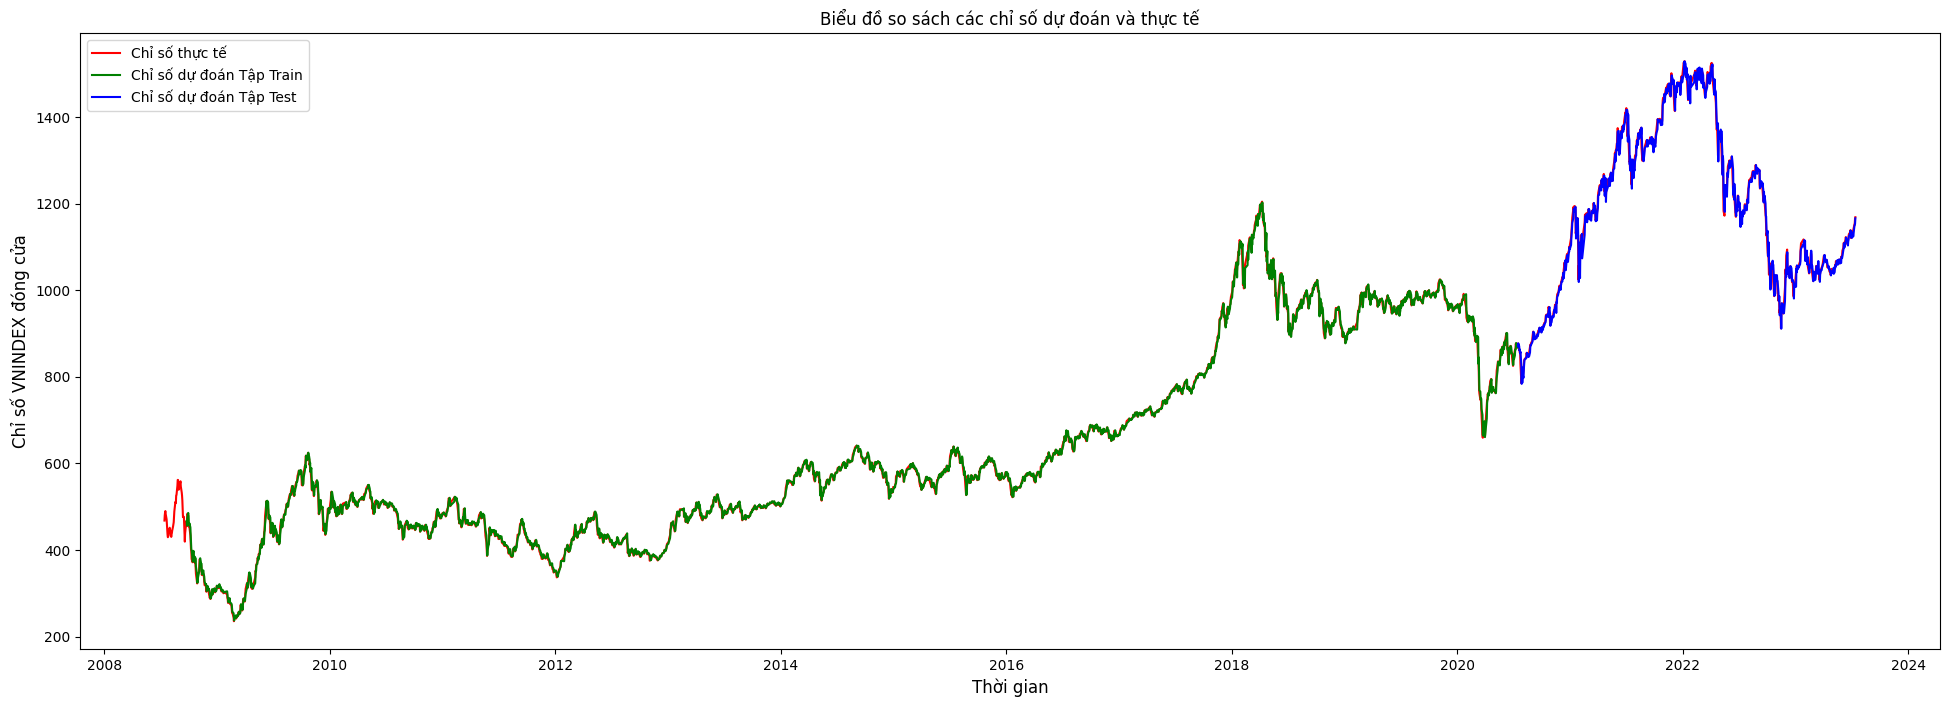

In [ ]:
#Lap bieu do so sanh
train_data1=df1[50:l_training_size]
test_data1=df1[l_training_size:]
#Thuc te
plt.figure(figsize=(24,8))
plt.plot(df1,label='Chỉ số thực tế',color='red')
#Tap train
train_data1['Predict']=l_y_train_predict
plt.plot(train_data1["Predict"],label='Chỉ số dự đoán Tập Train',color='green')
#Tap test
test_data1['Predict']=l_y_test_predict
plt.plot(test_data1["Predict"],label='Chỉ số dự đoán Tập Test',color='blue')

plt.title('Biểu đồ so sách các chỉ số dự đoán và thực tế',fontsize=12)
plt.xlabel('Thời gian',fontsize=12)
plt.ylabel('Chỉ số VNINDEX đóng cửa',fontsize=12)
plt.legend()
plt.show()

In [ ]:
#LSTM: Ket thuc ap dung mo hinh

Buoc 7: Đo lường độ chính xác

In [ ]:
#GRU: Do luong

In [25]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print('Train data MAPE:',mean_absolute_percentage_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print('Test data MAPE:',mean_absolute_percentage_error(original_ytest,test_predict))

Train data R2 score: 0.9986573343923377
Train data explained variance regression score: 0.9986578440279146
Train data MGD:  0.00016961862217256115
Train data MPD:  0.09489769932957995
Train data RMSE:  7.8143944425847165
Train data MSE:  61.064760504298896
Train data MAE:  5.458614063767941
Train data MAPE: 0.009371767555080216
-------------------------------------------------------------------------------------
Test data R2 score: 0.9908873036493997
Test data explained variance regression score: 0.9912423810459825
Test data MGD:  0.0001850995511173405
Test data MPD:  0.22054846504076162
Test data RMSE:  16.351236809400664
Test data MSE:  267.36294519709924
Test data MAE:  11.217901263803205
Test data MAPE: 0.009358268958629578


In [ ]:
#GRU: Ket thu do luong

In [ ]:
#LSTM: Do luong

In [ ]:
print('Độ phù hợp của tập train:',r2_score(l_y_train,l_y_train_predict))
print("Train data explained variance regression score:", explained_variance_score(l_y_train,l_y_train_predict))
print("Train data MGD: ", mean_gamma_deviance(l_y_train,l_y_train_predict))
print("Train data MPD: ", mean_poisson_deviance(l_y_train,l_y_train_predict))
print('Train data RMSE:',np.sqrt(mean_squared_error(l_y_train,l_y_train_predict)))
print("Train data MSE: ", mean_squared_error(l_y_train,l_y_train_predict))
print('Train data MAE:',mean_absolute_error(l_y_train,l_y_train_predict))
print('Train data MAPE:',mean_absolute_percentage_error(l_y_train,l_y_train_predict))
print("----------------------------------------------------------------------")
print('Độ phù hợp của tập test:',r2_score(l_y_test,l_y_test_predict))
print("Test data explained variance regression score:", explained_variance_score(l_y_test,l_y_test_predict))
print("Test data MGD: ", mean_gamma_deviance(l_y_test,l_y_test_predict))
print("Test data MPD: ", mean_poisson_deviance(l_y_test,l_y_test_predict))
print('Test data RMSE:',np.sqrt(mean_squared_error(l_y_test,l_y_test_predict)))
print("Test data MSE: ", mean_squared_error(l_y_test,l_y_test_predict))
print('Test data MAE:',mean_absolute_error(l_y_test,l_y_test_predict))
print('Test data MAPE:',mean_absolute_percentage_error(l_y_test,l_y_test_predict))

Độ phù hợp của tập train: 0.9986017351557085
Train data explained variance regression score: 0.998606992874821
Train data MGD:  0.0001758518839432789
Train data MPD:  0.09846668891369446
Train data RMSE: 7.975021684609567
Train data MSE:  63.60097086999282
Train data MAE: 5.527831975537557
Train data MAPE: 0.009474847068587176
----------------------------------------------------------------------
Độ phù hợp của tập test: 0.9927274372117281
Test data explained variance regression score: 0.9927767544746476
Test data MGD:  0.00018465691234973035
Test data MPD:  0.21451286828029698
Test data RMSE: 15.965555358400158
Test data MSE:  254.89895790213998
Test data MAE: 11.391604088541671
Test data MAPE: 0.009660415495643424


In [ ]:
#LSTM: Ket thuc do luong

Buoc 8: Du bao

In [ ]:
#GRU: Ung dung mo hinh de bao 80 ngay tiep theo

In [26]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [27]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
[51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80]


In [28]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(df2[len(df2)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [29]:
lstmdf=df2.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#GRU: Ket thu ung dung mo hinh du bao 80 ngay tiep theo